# Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск.

### Задание-1
Постройте график зависимости весов всех признаков от lambda в L2-регуляризации (на данных из урока).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# К признаку стажа добавим признаки: средняя стоимость занятия,
# квалификация репетитора
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],
              [500, 700, 750, 600, 1450, 800, 1500, 2000, 450, 1000],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2]])

In [3]:
y = [45, 55, 50, 59, 65, 35, 75, 80, 50, 60]

In [4]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [7]:
def calc_std_fit(x):
    res = (x - x.mean()) / x.std()
    return res

In [9]:
X_st = X.copy().astype(np.float64)
X1_mean = X[1].mean()
X1_std = X[1].std()

X1_mean, X1_std

(2.6, 2.8000000000000003)

In [10]:
X_st[1] = calc_std_fit(X[1])
X_st[2] = calc_std_fit(X[2])
X_st[3] = calc_std_fit(X[3])

X_st

array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
       [-0.57142857, -0.57142857, -0.21428571, -0.57142857,  0.14285714,
        -0.92857143,  0.85714286,  2.64285714, -0.57142857, -0.21428571],
       [-0.97958969, -0.56713087, -0.46401617, -0.77336028,  0.97958969,
        -0.36090146,  1.08270439,  2.11385144, -1.08270439,  0.05155735],
       [-0.89625816, -0.89625816,  0.38411064, -0.89625816,  0.38411064,
        -0.89625816,  1.66447944,  1.66447944, -0.89625816,  0.38411064]])

In [11]:
def eval_model_reg2(X, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), X.T) + lambda_ * W) 
        if i % (iterations / 10) == 0:
            print(i, W, err)
    return W

In [12]:
lambdas = np.arange(1e-8, 1e-5, 3e-8)
W = {'W1': [], 'W2': [], 'W3': [], 'W4': []}

for lambda_ in lambdas:
    Model_W = eval_model_reg2(X_st, y, iterations=5000, alpha=1e-2, lambda_=lambda_)
    W['W1'].append(Model_W[0])
    W['W2'].append(Model_W[1])
    W['W3'].append(Model_W[2])
    W['W4'].append(Model_W[3])

500 [57.39766531  5.10794279  2.46013457  4.08693804] 39.98154849413882
1000 [57.39999962  5.76653139  1.85622328  4.03914635] 39.80712258852931
1500 [57.39999971  5.99153666  1.60432674  4.06912265] 39.78234066332436
2000 [57.39999971  6.07258422  1.50040906  4.09331593] 39.77848906219116
2500 [57.39999971  6.10298562  1.45781137  4.1060667 ] 39.77786771988126
3000 [57.39999971  6.11472078  1.44041515  4.11195712] 39.77776605586327
3500 [57.39999971  6.11933796  1.43332655  4.11452269] 39.7777493349922
4000 [57.39999971  6.12117695  1.43044191  4.11560684] 39.77774657967355
4500 [57.39999971  6.12191502  1.42926896  4.11605742] 39.77774612531997
5000 [57.39999971  6.12221264  1.42879223  4.11624291] 39.777746050371924
500 [57.39766445  5.10794272  2.46013464  4.08693799] 39.98154852635076
1000 [57.39999876  5.76653119  1.85622348  4.03914629] 39.8071226186175
1500 [57.39999885  5.99153638  1.60432703  4.06912257] 39.782340680112625
2000 [57.39999885  6.0725839   1.5004094   4.09331584

3000 [57.39998938  6.1147166   1.44041979  4.11195585] 39.77776607285629
3500 [57.39998938  6.11933373  1.43333127  4.11452139] 39.77774934204786
4000 [57.39998938  6.12117269  1.43044667  4.11560552] 39.777746582623536
4500 [57.39998938  6.12191075  1.42927373  4.11605609] 39.777746126590195
5000 [57.39998938  6.12220836  1.42879702  4.11624159] 39.777746050957845
500 [57.39765413  5.10794176  2.4601355   4.0869373 ] 39.98154891300999
1000 [57.39998842  5.76652877  1.85622588  4.03914552] 39.80712297979271
1500 [57.39998852  5.99153304  1.60433052  4.06912162] 39.78234088168991
2000 [57.39998852  6.07258007  1.50041354  4.09331473] 39.77848916375531
2500 [57.39998852  6.10298121  1.45781621  4.10606538] 39.77786776380391
3000 [57.39998852  6.11471625  1.44042017  4.11195574] 39.777766074282376
3500 [57.39998852  6.11933337  1.43333167  4.11452128] 39.77774934264586
4000 [57.39998852  6.12117233  1.43044707  4.11560541] 39.77774658287941
4500 [57.39998852  6.12191039  1.42927413  4.116

500 [57.3976438   5.10794081  2.46013636  4.08693662] 39.981549299883646
1000 [57.39997809  5.76652635  1.85622829  4.03914475] 39.80712334118404
1500 [57.39997819  5.99152969  1.60433402  4.06912067] 39.782341083485676
2000 [57.39997819  6.07257624  1.50041767  4.09331362] 39.77848925773633
2500 [57.39997819  6.10297714  1.45782068  4.10606417] 39.77786780457851
3000 [57.39997819  6.11471206  1.44042481  4.11195447] 39.7777660915158
3500 [57.39997819  6.11932914  1.43333639  4.11451998] 39.777749349942226
4000 [57.39997819  6.12116807  1.43045182  4.1156041 ] 39.77774658607022
4500 [57.39997819  6.12190612  1.42927891  4.11605466] 39.777746128217196
5000 [57.39997819  6.12220372  1.4288022   4.11624015] 39.77774605184363
500 [57.39764294  5.10794073  2.46013643  4.08693657] 39.98154933213283
1000 [57.39997723  5.76652614  1.85622849  4.03914468] 39.80712337130972
1500 [57.39997733  5.99152941  1.60433431  4.06912059] 39.78234110031188
2000 [57.39997733  6.07257592  1.50041801  4.09331

4500 [57.39996786  6.12190185  1.42928368  4.11605333] 39.777746129950735
5000 [57.39996786  6.12219945  1.42880698  4.11623882] 39.777746052892994
500 [57.39763261  5.10793978  2.46013729  4.08693589] 39.98154971923869
1000 [57.3999669   5.76652372  1.85623089  4.03914391] 39.80712373293515
1500 [57.399967    5.99152606  1.6043378   4.06911964] 39.782341302344356
2000 [57.399967    6.07257209  1.50042214  4.09331241] 39.77848935979772
2500 [57.399967    6.10297273  1.45782553  4.10606285] 39.777867849000856
3000 [57.399967    6.11470753  1.44042984  4.11195309] 39.77776611043581
3500 [57.399967    6.11932455  1.4333415   4.11451857] 39.7777493580974
4000 [57.399967    6.12116346  1.43045698  4.11560267] 39.77774658977786
4500 [57.399967    6.12190149  1.42928408  4.11605322] 39.77774613010523
5000 [57.399967    6.12219909  1.42880738  4.11623871] 39.777746052990445
500 [57.39763175  5.1079397   2.46013736  4.08693583] 39.98154975150722
1000 [57.39996604  5.76652352  1.85623109  4.0391

1500 [57.39995666  5.99152271  1.6043413   4.06911869] 39.78234150459533
2000 [57.39995666  6.07256825  1.50042627  4.0933113 ] 39.77848945423771
2500 [57.39995666  6.10296866  1.45782999  4.10606164] 39.7778678902367
3000 [57.39995666  6.11470335  1.44043447  4.11195181] 39.77776612813164
3500 [57.39995666  6.11932031  1.43334622  4.11451727] 39.77774936585672
4000 [57.39995666  6.12115919  1.43046174  4.11560135] 39.7777465934319
4500 [57.39995666  6.12189722  1.42928886  4.1160519 ] 39.77774613207969
5000 [57.39995666  6.12219481  1.42881217  4.11623738] 39.777746054280726
500 [57.39762142  5.10793875  2.46013822  4.08693515] 39.98155013884534
1000 [57.39995571  5.7665211   1.85623349  4.03914308] 39.80712412493982
1500 [57.3999558   5.99152244  1.60434159  4.06911861] 39.78234152145943
2000 [57.3999558   6.07256794  1.50042662  4.09331121] 39.77848946211765
2500 [57.3999558   6.10296832  1.45783037  4.10606153] 39.777867893683016
3000 [57.3999558   6.114703    1.44043486  4.1119517

4500 [57.39994633  6.12189295  1.42929363  4.11605058] 39.77774613427653
5000 [57.39994633  6.12219054  1.42881695  4.11623606] 39.77774605579343
500 [57.3976111   5.1079378   2.46013908  4.08693447] 39.98155052639787
1000 [57.39994537  5.76651868  1.85623589  4.03914231] 39.80712448701542
1500 [57.39994547  5.99151909  1.60434508  4.06911766] 39.78234172394706
2000 [57.39994547  6.0725641   1.50043075  4.0933101 ] 39.7784895567963
2500 [57.39994547  6.10296425  1.45783484  4.10606032] 39.777867935158675
3000 [57.39994547  6.11469881  1.4404395   4.11195044] 39.777766147552555
3500 [57.39994547  6.11931572  1.43335133  4.11451585] 39.77774937451342
4000 [57.39994547  6.12115458  1.43046689  4.11559992] 39.77774659764136
4500 [57.39994547  6.12189259  1.42929403  4.11605047] 39.777746134469666
5000 [57.39994547  6.12219018  1.42881735  4.11623595] 39.77774605592953
500 [57.39761023  5.10793772  2.46013916  4.08693441] 39.98155055870358
1000 [57.39994451  5.76651848  1.85623609  4.039142

500 [57.39760163  5.10793693  2.46013987  4.08693384] 39.98155088184269
1000 [57.3999359   5.76651646  1.85623809  4.0391416 ] 39.80712481910787
1500 [57.399936    5.99151602  1.60434829  4.06911678] 39.782341909752695
2000 [57.399936    6.07256059  1.50043454  4.09330908] 39.77848964377864
2500 [57.399936    6.10296052  1.45783893  4.10605921] 39.777867973372516
3000 [57.399936    6.11469498  1.44044375  4.11194927] 39.7777661641891
3500 [57.399936    6.11931184  1.43335566  4.11451466] 39.77774938204198
4000 [57.399936    6.12115067  1.43047125  4.11559872] 39.777746601407
4500 [57.399936    6.12188867  1.42929841  4.11604925] 39.777746136695775
5000 [57.399936    6.12218626  1.42882173  4.11623473] 39.777746057528574
500 [57.39760077  5.10793685  2.46013994  4.08693379] 39.981550914164785
1000 [57.39993504  5.76651626  1.85623829  4.03914154] 39.80712484930709
1500 [57.39993514  5.99151574  1.60434858  4.06911671] 39.782341926653245
2000 [57.39993514  6.07256027  1.50043488  4.09330

3500 [57.39992567  6.1193076   1.43336038  4.11451336] 39.77774939046796
4000 [57.39992567  6.12114641  1.43047601  4.1155974 ] 39.777746605728034
4500 [57.39992567  6.1218844   1.42930318  4.11604793] 39.777746139337424
5000 [57.39992567  6.12218198  1.42882652  4.1162334 ] 39.77774605948613
500 [57.39759044  5.1079359   2.4601408   4.08693311] 39.98155130214609
1000 [57.39992471  5.76651384  1.8562407   4.03914077] 39.807125211814835
1500 [57.39992481  5.99151239  1.60435207  4.06911575] 39.7823421295779
2000 [57.39992481  6.07255644  1.50043901  4.09330788] 39.778489746814635
2500 [57.39992481  6.10295611  1.45784377  4.10605789] 39.77786801877418
3000 [57.39992481  6.11469045  1.44044878  4.11194789] 39.77776618409089
3500 [57.39992481  6.11930725  1.43336077  4.11451325] 39.77774939118015
4000 [57.39992481  6.12114606  1.43047641  4.11559729] 39.77774660609815
4500 [57.39992481  6.12188405  1.42930358  4.11604782] 39.77774613956761
5000 [57.39992481  6.12218162  1.42882692  4.1162

1000 [57.39991438  5.76651141  1.8562431   4.03914   ] 39.80712557453868
1500 [57.39991447  5.99150905  1.60435557  4.0691148 ] 39.78234233272101
2000 [57.39991447  6.07255261  1.50044314  4.09330676] 39.77848984215423
2500 [57.39991447  6.10295204  1.45784824  4.10605667] 39.77786806091401
3000 [57.39991447  6.11468626  1.44045341  4.11194662] 39.77776620269297
3500 [57.39991447  6.11930301  1.43336549  4.11451195] 39.77774939984683
4000 [57.39991447  6.12114179  1.43048117  4.11559597] 39.77774661066009
4500 [57.39991447  6.12187977  1.42930836  4.11604649] 39.77774614245017
5000 [57.39991447  6.12217735  1.4288317   4.11623196] 39.777746061857776
500 [57.39757925  5.10793487  2.46014174  4.08693237] 39.98155172270106
1000 [57.39991352  5.76651121  1.8562433   4.03913993] 39.807125604775436
1500 [57.39991361  5.99150877  1.60435586  4.06911472] 39.78234234965946
2000 [57.39991361  6.07255229  1.50044349  4.09330667] 39.77848985010917
2500 [57.39991361  6.1029517   1.45784862  4.10605

1000 [57.39990405  5.76650899  1.8562455   4.03913922] 39.80712593747858
1500 [57.39990414  5.9915057   1.60435906  4.06911385] 39.78234253608263
2000 [57.39990414  6.07254877  1.50044728  4.09330565] 39.77848993771416
2500 [57.39990414  6.10294797  1.45785271  4.10605546] 39.777868103275246
3000 [57.39990414  6.11468208  1.44045805  4.11194534] 39.77776622151701
3500 [57.39990414  6.11929877  1.43337021  4.11451064] 39.777749408735716
4000 [57.39990414  6.12113753  1.43048593  4.11559466] 39.777746615444336
4500 [57.39990414  6.1218755   1.42931313  4.11604517] 39.77774614555516
5000 [57.39990414  6.12217307  1.42883649  4.11623064] 39.77774606427874
500 [57.39756893  5.10793392  2.4601426   4.08693169] 39.981552111129005
1000 [57.39990319  5.76650879  1.8562457   4.03913916] 39.80712596773334
1500 [57.39990328  5.99150542  1.60435935  4.06911377] 39.7823425530393
2000 [57.39990328  6.07254846  1.50044762  4.09330556] 39.77848994568745
2500 [57.39990328  6.10294763  1.45785308  4.1060

2500 [57.39989381  6.1029439   1.45785718  4.10605424] 39.77786814585785
3000 [57.39989381  6.1146779   1.44046269  4.11194407] 39.777766240563
3500 [57.39989381  6.11929454  1.43337493  4.11450934] 39.77774941784683
4000 [57.39989381  6.12113327  1.43049068  4.11559334] 39.77774662045091
4500 [57.39989381  6.12187123  1.42931791  4.11604385] 39.777746148882485
5000 [57.39989381  6.12216879  1.42884127  4.11622931] 39.77774606692207
500 [57.3975586   5.10793297  2.46014346  4.08693101] 39.981552499771304
1000 [57.39989285  5.76650637  1.8562481   4.03913839] 39.80712633090734
1500 [57.39989295  5.99150207  1.60436285  4.06911282] 39.78234275663763
2000 [57.39989295  6.07254462  1.50045175  4.09330445] 39.77849004148609
2500 [57.39989295  6.10294356  1.45785755  4.10605414] 39.7778681494164
3000 [57.39989295  6.11467755  1.44046308  4.11194397] 39.77776624216014
3500 [57.39989295  6.11929418  1.43337533  4.11450923] 39.777749418616146
4000 [57.39989295  6.12113292  1.43049108  4.1155932

1500 [57.39988348  5.991499    1.60436605  4.06911195] 39.78234294346136
2000 [57.39988348  6.07254111  1.50045554  4.09330343] 39.77849012949505
2500 [57.39988348  6.10293983  1.45786165  4.10605303] 39.777868188661856
3000 [57.39988348  6.11467371  1.44046733  4.1119428 ] 39.77776625983087
3500 [57.39988348  6.1192903   1.43337965  4.11450804] 39.77774942718014
4000 [57.39988348  6.12112901  1.43049544  4.11559202] 39.777746625679846
4500 [57.39988348  6.12186696  1.42932269  4.11604252] 39.77774615243226
5000 [57.39988348  6.12216452  1.42884605  4.11622798] 39.777746069787845
500 [57.39754827  5.10793202  2.46014432  4.08693033] 39.981552888628
1000 [57.39988252  5.76650395  1.85625051  4.03913762] 39.80712669429742
1500 [57.39988262  5.99149873  1.60436634  4.06911187] 39.782342960454415
2000 [57.39988262  6.07254079  1.50045588  4.09330334] 39.77849013750503
2500 [57.39988262  6.10293949  1.45786202  4.10605293] 39.777868192238856
3000 [57.39988262  6.11467336  1.44046772  4.1119

500 [57.3975388   5.10793115  2.46014511  4.0869297 ] 39.98155324526827
1000 [57.39987305  5.76650173  1.85625271  4.03913691] 39.807127027594845
1500 [57.39987315  5.99149566  1.60436955  4.069111  ] 39.782343147478436
2000 [57.39987315  6.07253728  1.50045967  4.09330232] 39.77849022571594
2500 [57.39987315  6.10293576  1.45786612  4.10605181] 39.77786823168724
3000 [57.39987315  6.11466953  1.44047197  4.11194153] 39.77776627932074
3500 [57.39987315  6.11928606  1.43338437  4.11450674] 39.777749436735675
4000 [57.39987315  6.12112475  1.4305002   4.1155907 ] 39.777746631131116
4500 [57.39987315  6.12186268  1.42932746  4.1160412 ] 39.7777461562044
5000 [57.39987315  6.12216024  1.42885084  4.11622666] 39.77774607287601
500 [57.39753794  5.10793107  2.46014518  4.08692965] 39.981553277699085
1000 [57.39987219  5.76650153  1.85625291  4.03913685] 39.80712705790362
1500 [57.39987229  5.99149538  1.60436984  4.06911092] 39.78234316448969
2000 [57.39987229  6.07253696  1.50046001  4.0933

4500 [57.39986368  6.12185877  1.42933184  4.11603998] 39.77774615985756
5000 [57.39986368  6.12215632  1.42885522  4.11622544] 39.77774607590227
500 [57.39752848  5.10793019  2.46014597  4.08692902] 39.9815536345359
1000 [57.39986272  5.76649931  1.85625511  4.03913614] 39.8071273913991
1500 [57.39986281  5.99149231  1.60437304  4.06911005] 39.78234335171401
2000 [57.39986281  6.07253345  1.5004638   4.09330121] 39.77849032215712
2500 [57.39986281  6.10293169  1.45787059  4.1060506 ] 39.77786827493401
3000 [57.39986281  6.11466535  1.4404766   4.11194025] 39.77776629903251
3500 [57.39986281  6.11928183  1.43338909  4.11450543] 39.777749446513425
4000 [57.39986281  6.12112049  1.43050496  4.11558939] 39.77774663680474
4500 [57.39986281  6.12185841  1.42933224  4.11603987] 39.77774616019896
5000 [57.39986281  6.12215596  1.42885562  4.11622533] 39.77774607618666
500 [57.39752762  5.10793012  2.46014604  4.08692897] 39.98155366698453
1000 [57.39986186  5.76649911  1.85625531  4.03913608]

4500 [57.39985334  6.1218545   1.42933662  4.11603866] 39.777746164055955
5000 [57.39985334  6.12215204  1.42886001  4.11622411] 39.77774607941673
500 [57.39751815  5.10792924  2.46014683  4.08692834] 39.98155402401786
1000 [57.39985239  5.76649689  1.85625751  4.03913537] 39.80712775541946
1500 [57.39985248  5.99148896  1.60437653  4.0691091 ] 39.78234355616805
2000 [57.39985248  6.07252961  1.50046793  4.0933001 ] 39.77849041881866
2500 [57.39985248  6.10292762  1.45787506  4.10604938] 39.77786831840218
3000 [57.39985248  6.11466116  1.44048124  4.11193898] 39.77776631896624
3500 [57.39985248  6.11927759  1.43339381  4.11450413] 39.77774945651335
4000 [57.39985248  6.12111623  1.43050972  4.11558807] 39.77774664270066
4500 [57.39985248  6.12185414  1.42933702  4.11603855] 39.77774616441588
5000 [57.39985248  6.12215168  1.42886041  4.116224  ] 39.77774607971965
500 [57.39751729  5.10792916  2.4601469   4.08692829] 39.98155405648437
1000 [57.39985153  5.76649668  1.85625771  4.0391353

2000 [57.39984215  6.07252578  1.50047206  4.09329899] 39.7784905157005
2500 [57.39984215  6.10292355  1.45787953  4.10604817] 39.77786836209174
3000 [57.39984215  6.11465698  1.44048588  4.11193771] 39.77776633912188
3500 [57.39984215  6.11927335  1.43339853  4.11450283] 39.77774946673553
4000 [57.39984215  6.12111197  1.43051448  4.11558675] 39.777746648818955
4500 [57.39984215  6.12184987  1.42934179  4.11603723] 39.777746168855224
5000 [57.39984215  6.12214741  1.42886519  4.11622267] 39.7777460834751
500 [57.39750696  5.10792821  2.46014776  4.08692761] 39.98155444619861
1000 [57.39984119  5.76649426  1.85626011  4.03913454] 39.80712815001864
1500 [57.39984129  5.99148534  1.60438032  4.06910807] 39.78234377790652
2000 [57.39984129  6.07252546  1.50047241  4.09329889] 39.77849052378395
2500 [57.39984129  6.10292321  1.4578799   4.10604807] 39.777868365742485
3000 [57.39984129  6.11465663  1.44048627  4.1119376 ] 39.77776634081157
3500 [57.39984129  6.119273    1.43339892  4.114502

2500 [57.39983182  6.10291948  1.457884    4.10604695] 39.77786840600264
3000 [57.39983182  6.1146528   1.44049052  4.11193643] 39.77776635949953
3500 [57.39983182  6.11926912  1.43340325  4.11450153] 39.77774947717988
4000 [57.39983182  6.12110771  1.43051923  4.11558544] 39.77774665515956
4500 [57.39983182  6.1218456   1.42934657  4.1160359 ] 39.777746173516924
5000 [57.39983182  6.12214313  1.42886997  4.11622135] 39.77774608745296
500 [57.39749664  5.10792726  2.46014862  4.08692692] 39.98155483612717
1000 [57.39983086  5.76649184  1.85626252  4.03913377] 39.80712851448918
1500 [57.39983096  5.99148199  1.60438381  4.06910712] 39.78234398281576
2000 [57.39983096  6.07252163  1.50047654  4.09329778] 39.77849062090446
2500 [57.39983096  6.10291914  1.45788437  4.10604685] 39.77786840967189
3000 [57.39983096  6.11465245  1.44049091  4.11193633] 39.777766361207696
3500 [57.39983096  6.11926876  1.43340364  4.11450142] 39.77774947806026
4000 [57.39983096  6.12110735  1.43051963  4.11558

4500 [57.39982149  6.12184132  1.42935134  4.11603458] 39.777746178401024
5000 [57.39982149  6.12213885  1.42887476  4.11622002] 39.777746091653256
500 [57.39748631  5.10792631  2.46014948  4.08692624] 39.98155522627012
1000 [57.39982053  5.76648942  1.85626492  4.039133  ] 39.80712887917575
1500 [57.39982063  5.99147864  1.60438731  4.06910617] 39.782344187943444
2000 [57.39982063  6.0725178   1.50048067  4.09329667] 39.778490718245315
2500 [57.39982063  6.10291507  1.45788884  4.10604564] 39.777868453822656
3000 [57.39982063  6.11464826  1.44049554  4.11193505] 39.77776638182573
3500 [57.39982063  6.11926453  1.43340836  4.11450011] 39.77774948874537
4000 [57.39982063  6.12110309  1.43052439  4.11558401] 39.777746662279434
4500 [57.39982063  6.12184097  1.42935174  4.11603447] 39.7777461788181
5000 [57.39982063  6.1221385   1.42887516  4.11621991] 39.77774609201332
500 [57.39748545  5.10792623  2.46014955  4.08692619] 39.98155525879173
1000 [57.39981967  5.76648922  1.85626512  4.039

1000 [57.3998102   5.766487    1.85626732  4.03913222] 39.807129244078425
1500 [57.39981029  5.9914753   1.6043908   4.06910522] 39.7823443932897
2000 [57.39981029  6.07251397  1.5004848   4.09329556] 39.77849081580645
2500 [57.39981029  6.102911    1.45789331  4.10604442] 39.77786849819482
3000 [57.39981029  6.11464408  1.44050018  4.11193378] 39.777766402665705
3500 [57.39981029  6.11926029  1.43341308  4.11449881] 39.777749499652685
4000 [57.39981029  6.12109883  1.43052915  4.11558269] 39.77774666908325
4500 [57.39981029  6.1218367   1.42935652  4.11603314] 39.77774618394317
5000 [57.39981029  6.12213422  1.42887994  4.11621858] 39.77774609645457
500 [57.39747512  5.10792528  2.46015041  4.08692551] 39.98155564916695
1000 [57.39980934  5.7664868   1.85626752  4.03913216] 39.80712927449671
1500 [57.39980943  5.99147502  1.6043911   4.06910514] 39.782344410411724
2000 [57.39980943  6.07251365  1.50048515  4.09329547] 39.77849082394649
2500 [57.39980943  6.10291066  1.45789368  4.1060

4000 [57.39979996  6.12109457  1.4305339   4.11558137] 39.77774667610939
4500 [57.39979996  6.12183242  1.42936129  4.11603182] 39.77774618929057
5000 [57.39979996  6.12212994  1.42888473  4.11621726] 39.77774610111822
500 [57.39746479  5.10792433  2.46015127  4.08692483] 39.981556039756555
1000 [57.399799    5.76648438  1.85626992  4.03913139] 39.80712963963347
1500 [57.3997991   5.99147167  1.60439459  4.06910419] 39.78234461599462
2000 [57.3997991   6.07250982  1.50048928  4.09329436] 39.778490921746304
2500 [57.3997991   6.10290659  1.45789815  4.10604311] 39.77786854651443
3000 [57.3997991   6.11463955  1.44050521  4.1119324 ] 39.777766425492786
3500 [57.3997991  6.1192557  1.4334182  4.1144974] 39.77774951171967
4000 [57.3997991   6.12109421  1.4305343   4.11558126] 39.77774667670492
4500 [57.3997991   6.12183207  1.42936169  4.11603171] 39.77774618974622
5000 [57.3997991   6.12212958  1.42888512  4.11621714] 39.77774610151686
500 [57.39746393  5.10792425  2.46015134  4.08692477]

4000 [57.39978963  6.12109031  1.43053866  4.11558006] 39.777746683357876
4500 [57.39978963  6.12182815  1.42936607  4.1160305 ] 39.77774619486037
5000 [57.39978963  6.12212566  1.42888951  4.11621593] 39.77774610600427
500 [57.39745447  5.10792338  2.46015213  4.08692415] 39.98155643056054
1000 [57.39978867  5.76648195  1.85627232  4.03913062] 39.80713000498631
1500 [57.39978877  5.99146832  1.60439808  4.06910324] 39.78234482179603
2000 [57.39978877  6.07250598  1.50049341  4.09329325] 39.77849101976644
2500 [57.39978877  6.10290252  1.45790262  4.10604189] 39.777868591347826
3000 [57.39978877  6.11463536  1.44050984  4.11193113] 39.77776644679518
3500 [57.39978877  6.11925147  1.43342292  4.1144961 ] 39.77774952308989
4000 [57.39978877  6.12108995  1.43053906  4.11557995] 39.777746683971934
4500 [57.39978877  6.12182779  1.42936647  4.11603039] 39.77774619533457
5000 [57.39978877  6.12212531  1.42888991  4.11621582] 39.777746106421475
500 [57.3974536   5.1079233   2.4601522   4.0869

5000 [57.3997793   6.12212139  1.42889429  4.1162146 ] 39.777746111112734
500 [57.39744414  5.10792243  2.46015299  4.08692346] 39.98155682157887
1000 [57.39977834  5.76647953  1.85627473  4.03912985] 39.80713037055526
1500 [57.39977844  5.99146497  1.60440158  4.06910229] 39.78234502781591
2000 [57.39977844  6.07250215  1.50049754  4.09329214] 39.77849111800692
2500 [57.39977844  6.10289845  1.45790708  4.10604068] 39.777868636402566
3000 [57.39977844  6.11463118  1.44051448  4.11192986] 39.777766468319484
3500 [57.39977844  6.11924723  1.43342764  4.1144948 ] 39.77774953468237
4000 [57.39977844  6.12108569  1.43054382  4.11557863] 39.777746691461275
4500 [57.39977844  6.12182352  1.42937124  4.11602906] 39.77774620114529
5000 [57.39977844  6.12212103  1.42889469  4.11621449] 39.777746111548495
500 [57.39744328  5.10792235  2.46015306  4.08692341] 39.981556854173434
1000 [57.39977748  5.76647933  1.85627493  4.03912978] 39.807130401029106
1500 [57.39977758  5.9914647   1.60440187  4.0

3000 [57.3997681   6.114627    1.44051912  4.11192858] 39.7777664900657
3500 [57.3997681   6.11924299  1.43343236  4.11449349] 39.777749546497006
4000 [57.3997681   6.12108143  1.43054858  4.11557731] 39.77774669917293
4500 [57.3997681   6.12181925  1.42937602  4.11602774] 39.77774620717845
5000 [57.3997681   6.12211675  1.42889948  4.11621316] 39.77774611689792
500 [57.39743295  5.1079214   2.46015392  4.08692273] 39.98155724542404
1000 [57.39976715  5.76647691  1.85627733  4.03912901] 39.807130766832096
1500 [57.39976724  5.99146135  1.60440536  4.06910126] 39.78234525125062
2000 [57.39976724  6.072498    1.50050202  4.09329093] 39.778491224682696
2500 [57.39976724  6.10289404  1.45791193  4.10603936] 39.777868685461726
3000 [57.39976724  6.11462665  1.44051951  4.11192848] 39.7777664918879
3500 [57.39976724  6.11924264  1.43343275  4.11449338] 39.77774954749158
4000 [57.39976724  6.12108108  1.43054897  4.1155772 ] 39.77774669982561
4500 [57.39976724  6.12181889  1.42937642  4.11602

2500 [57.39975777  6.10289031  1.45791602  4.10603825] 39.7778687271762
3000 [57.39975777  6.11462281  1.44052376  4.11192731] 39.77776651203387
3500 [57.39975777  6.11923876  1.43343708  4.11449219] 39.77774955853388
4000 [57.39975777  6.12107717  1.43055333  4.115576  ] 39.77774670710694
4500 [57.39975777  6.12181498  1.42938079  4.11602641] 39.777746213433986
5000 [57.39975777  6.12211248  1.42890426  4.11621184] 39.777746122469765
500 [57.39742262  5.10792045  2.46015478  4.08692205] 39.98155763688901
1000 [57.39975682  5.76647449  1.85627973  4.03912824] 39.807131132851204
1500 [57.39975691  5.991458    1.60440886  4.06910031] 39.7823454577257
2000 [57.39975691  6.07249417  1.50050615  4.09328982] 39.778491323382106
2500 [57.39975691  6.10288997  1.45791639  4.10603815] 39.77786873097766
3000 [57.39975691  6.11462247  1.44052414  4.11192721] 39.77776651387456
3500 [57.39975691  6.1192384   1.43343747  4.11449208] 39.77774955954697
4000 [57.39975691  6.12107681  1.43055373  4.11557

5000 [57.39974744  6.1221082   1.42890904  4.11621051] 39.777746128264056
500 [57.3974123   5.1079195   2.46015564  4.08692137] 39.98155802856838
1000 [57.39974648  5.76647207  1.85628213  4.03912747] 39.80713149908637
1500 [57.39974658  5.99145465  1.60441235  4.06909935] 39.782345664419225
2000 [57.39974658  6.07249034  1.50051028  4.09328871] 39.77849142230187
2500 [57.39974658  6.1028859   1.45792086  4.10603693] 39.77786877671502
3000 [57.39974658  6.11461828  1.44052878  4.11192593] 39.77776653608316
3500 [57.39974658  6.11923417  1.43344219  4.11449078] 39.77774957182457
4000 [57.39974658  6.12107255  1.43055849  4.11557457] 39.77774671595297
4500 [57.39974658  6.12181035  1.42938597  4.11602498] 39.77774622046175
5000 [57.39974658  6.12210784  1.42890944  4.1162104 ] 39.77774612875693
500 [57.39741144  5.10791942  2.46015572  4.08692131] 39.981558061217996
1000 [57.39974562  5.76647187  1.85628233  4.03912741] 39.80713152961573
1500 [57.39974572  5.99145438  1.60441264  4.06909

4000 [57.39973711  6.12106865  1.43056285  4.11557336] 39.77774672364193
4500 [57.39973711  6.12180643  1.42939035  4.11602377] 39.77774622661218
5000 [57.39973711  6.12210392  1.42891383  4.11620918] 39.77774613428074
500 [57.39740197  5.10791854  2.4601565   4.08692069] 39.98155842046213
1000 [57.39973615  5.76646965  1.85628453  4.0391267 ] 39.807131865537634
1500 [57.39973625  5.99145131  1.60441585  4.0690984 ] 39.78234587133123
2000 [57.39973625  6.0724865   1.50051441  4.0932876 ] 39.77849152144194
2500 [57.39973625  6.10288183  1.45792533  4.10603572] 39.777868822673774
3000 [57.39973625  6.1146141   1.44053342  4.11192466] 39.777766558513726
3500 [57.39973625  6.11922993  1.43344691  4.11448948] 39.777749584324326
4000 [57.39973625  6.12106829  1.43056325  4.11557325] 39.77774672435018
4500 [57.39973625  6.12180608  1.42939074  4.11602366] 39.777746227180586
5000 [57.39973625  6.12210357  1.42891423  4.11620907] 39.777746134792146
500 [57.39740111  5.10791847  2.46015658  4.08

3000 [57.39972678  6.11461026  1.44053767  4.11192349] 39.77776657927002
3500 [57.39972678  6.11922605  1.43345123  4.11448828] 39.77774959597766
4000 [57.39972678  6.12106439  1.43056761  4.11557205] 39.77774673224291
4500 [57.39972678  6.12180216  1.42939512  4.11602244] 39.77774623353488
5000 [57.39972678  6.12209965  1.42891861  4.11620786] 39.77774614051982
500 [57.39739164  5.10791759  2.46015736  4.08692   ] 39.981558812570256
1000 [57.39972582  5.76646723  1.85628694  4.03912593] 39.80713223220494
1500 [57.39972592  5.99144796  1.60441934  4.06909745] 39.78234607846173
2000 [57.39972592  6.07248267  1.50051854  4.09328649] 39.77849162080233
2500 [57.39972592  6.10287776  1.4579298   4.1060345 ] 39.77786886885389
3000 [57.39972592  6.11460992  1.44053806  4.11192339] 39.77776658116619
3500 [57.39972592  6.11922569  1.43345163  4.11448817] 39.77774959704632
4000 [57.39972592  6.12106403  1.430568    4.11557194] 39.7777467329697
4500 [57.39972592  6.12180181  1.42939552  4.1160223

3000 [57.39971645  6.11460608  1.44054231  4.11192222] 39.77776660212595
3500 [57.39971645  6.11922181  1.43345595  4.11448698] 39.777749608903356
4000 [57.39971645  6.12106013  1.43057237  4.11557073] 39.777746741066245
4500 [57.39971645  6.12179789  1.4293999   4.11602112] 39.77774624067997
5000 [57.39971645  6.12209537  1.42892339  4.11620653] 39.777746146981336
500 [57.39738131  5.10791664  2.46015822  4.08691932] 39.98155920489275
1000 [57.39971549  5.7664648   1.85628934  4.03912516] 39.80713259908838
1500 [57.39971558  5.99144461  1.60442284  4.0690965 ] 39.7823462858107
2000 [57.39971558  6.07247884  1.50052267  4.09328538] 39.77849172038297
2500 [57.39971558  6.10287369  1.45793427  4.10603329] 39.77786891525538
3000 [57.39971558  6.11460573  1.4405427   4.11192211] 39.77776660404061
3500 [57.39971558  6.11922146  1.43345635  4.11448687] 39.777749609990536
4000 [57.39971558  6.12105977  1.43057276  4.11557062] 39.77774674181157
4500 [57.39971558  6.12179753  1.42940029  4.1160

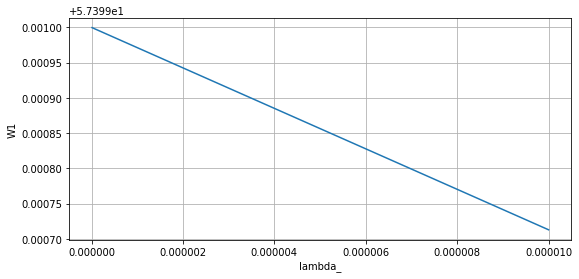

In [48]:
plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.plot(lambdas, W['W1'])
plt.xlabel("lambda_")
plt.ylabel("W1")
plt.grid(True)

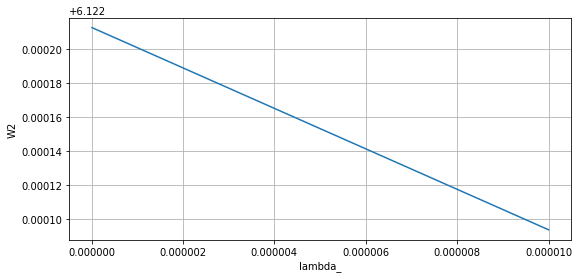

In [49]:
plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.plot(lambdas, W['W2'])
plt.xlabel("lambda_")
plt.ylabel("W2")
plt.grid(True) 

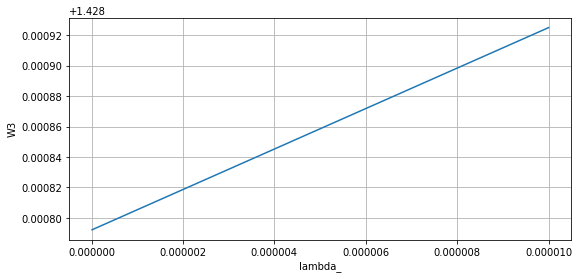

In [50]:
plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.plot(lambdas, W['W3'])
plt.xlabel("lambda_")
plt.ylabel("W3")
plt.grid(True) 

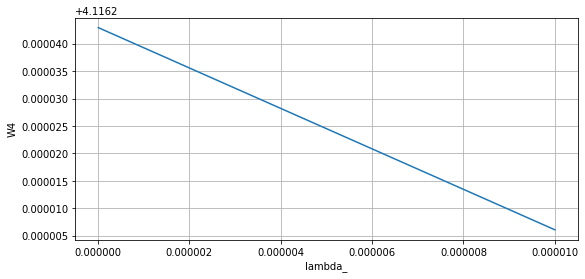

In [51]:
plt.figure(figsize=(9, 9))
plt.subplot(2, 1, 1)
plt.plot(lambdas, W['W4'])
plt.xlabel("lambda_")
plt.ylabel("W4")
plt.grid(True) 

### Задание-2
Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?

Нет, потому что нормализация конвертирует все значения в отрезке [0, 1], а стандартизация конвертирует mean к 0 и std = 1.